In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_excel('old.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [3]:
df.shape

(29904, 13)

In [4]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [5]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


### Handling Missing Data

In [6]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.shape

(29886, 13)

In [8]:
df.duplicated().sum()

0

### Cleaning Dataset (Numerical)

In [9]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29886.000000,29886.000000,29886.000000,29886.000000
mean,43.396105,2.379910,23.364184,20892.303821
std,13.412657,1.431201,24.740339,6936.813440
min,26.000000,-3.000000,1.000000,3625.000000
25%,34.000000,1.000000,7.000000,15697.250000
50%,42.000000,3.000000,17.000000,20489.000000
75%,52.000000,3.000000,32.000000,26360.000000
max,356.000000,5.000000,930.000000,43471.000000


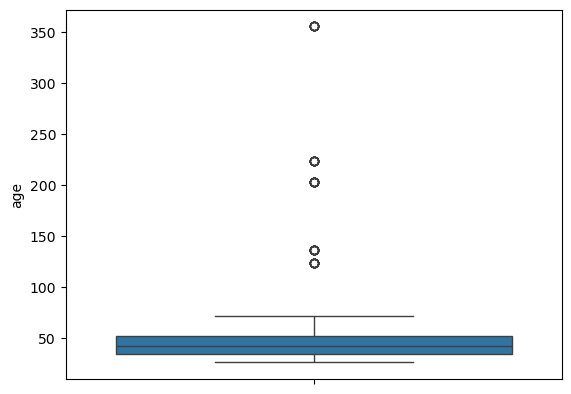

In [10]:
sns.boxplot(df['age'])
plt.show()

In [11]:
df1 = df[df['age'] < 100].copy()

In [12]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29828.000000,29828.000000,29828.000000,29828.000000
mean,43.095380,2.381755,23.371530,20901.900563
std,11.041991,1.430735,24.751262,6928.457636
min,26.000000,-3.000000,1.000000,6538.000000
25%,34.000000,1.000000,7.000000,15706.000000
50%,42.000000,3.000000,17.000000,20496.000000
75%,52.000000,3.000000,32.000000,26361.000000
max,72.000000,5.000000,930.000000,43471.000000


In [13]:
df1[df1.number_of_dependants<0].shape

(50, 13)

In [14]:
(df1['number_of_dependants'] < 0).sum()

50

In [15]:
df1['number_of_dependants'] = abs(df1['number_of_dependants'])

In [16]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29828.000000,29828.000000,29828.000000,29828.000000
mean,43.095380,2.387790,23.371530,20901.900563
std,11.041991,1.420641,24.751262,6928.457636
min,26.000000,0.000000,1.000000,6538.000000
25%,34.000000,1.000000,7.000000,15706.000000
50%,42.000000,3.000000,17.000000,20496.000000
75%,52.000000,3.000000,32.000000,26361.000000
max,72.000000,5.000000,930.000000,43471.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

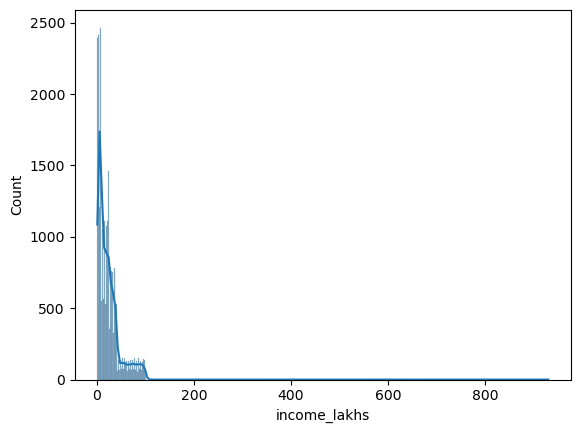

In [17]:
sns.histplot(df1['income_lakhs'], kde=True)

In [18]:
income_threshold = df1.income_lakhs.quantile(0.999)

df2 = df1[df1.income_lakhs < income_threshold].copy()
income_threshold

100.0

In [19]:
total_entries = df1[(df1['income_lakhs'] > 96) & (df1['income_lakhs'] < 100)].shape[0]
total_entries

211

In [20]:

df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29754.000000,29754.000000,29754.000000,29754.000000
mean,43.097432,2.387679,23.050884,20891.777811
std,11.043700,1.420724,22.178726,6929.595513
min,26.000000,0.000000,1.000000,6538.000000
25%,34.000000,1.000000,7.000000,15698.250000
50%,42.000000,3.000000,17.000000,20480.000000
75%,52.000000,3.000000,32.000000,26355.750000
max,72.000000,5.000000,99.000000,43471.000000


In [21]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [22]:
df2['smoking_status'].value_counts()

smoking_status
No Smoking        13441
Regular           11146
Occasional         5155
Not Smoking           6
Does Not Smoke        3
Smoking=0             3
Name: count, dtype: int64

<Axes: ylabel='annual_premium_amount'>

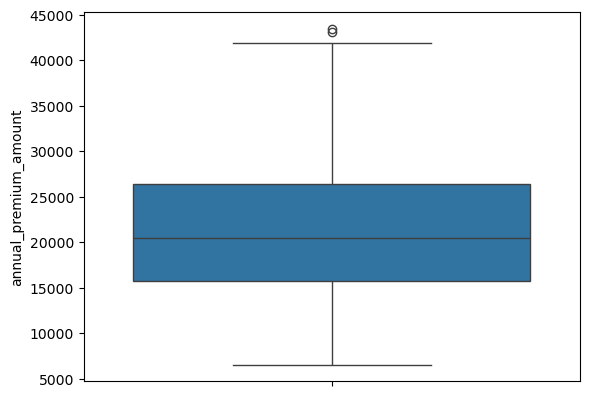

In [23]:
sns.boxplot(df2['annual_premium_amount'])

In [24]:
col_num = df.describe().columns
col_num

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

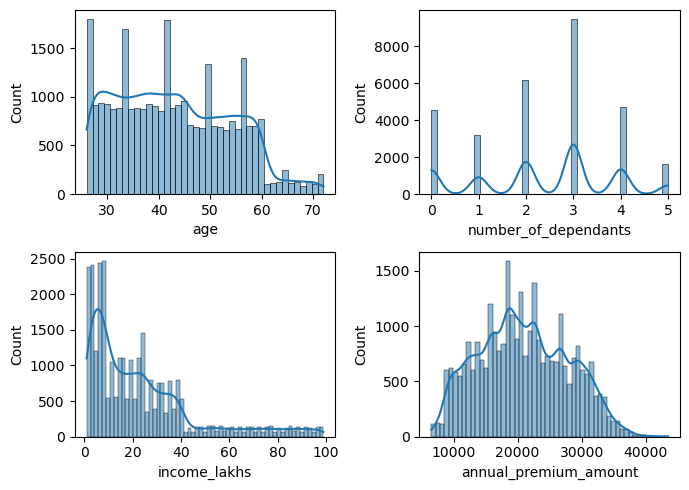

In [25]:
#for i in col:
 #   plt.figure(figsize=(10, 10))
  #  sns.histplot(df2[i], kde=True)
   # plt.show()

fig, axes = plt.subplots(2, 2, figsize=(7, 5))  # Create a 2x2 grid of subplots
axes = axes.flatten()  # Flatten the 2D array for easy indexing

for idx, i in enumerate(col_num):  
    sns.histplot(df2[i], kde=True, ax=axes[idx])  # Plot on the respective subplot
    #axes[idx].set_title(f"Distribution of {i}")

plt.tight_layout()  # Adjust spacing to avoid overlap
plt.show()


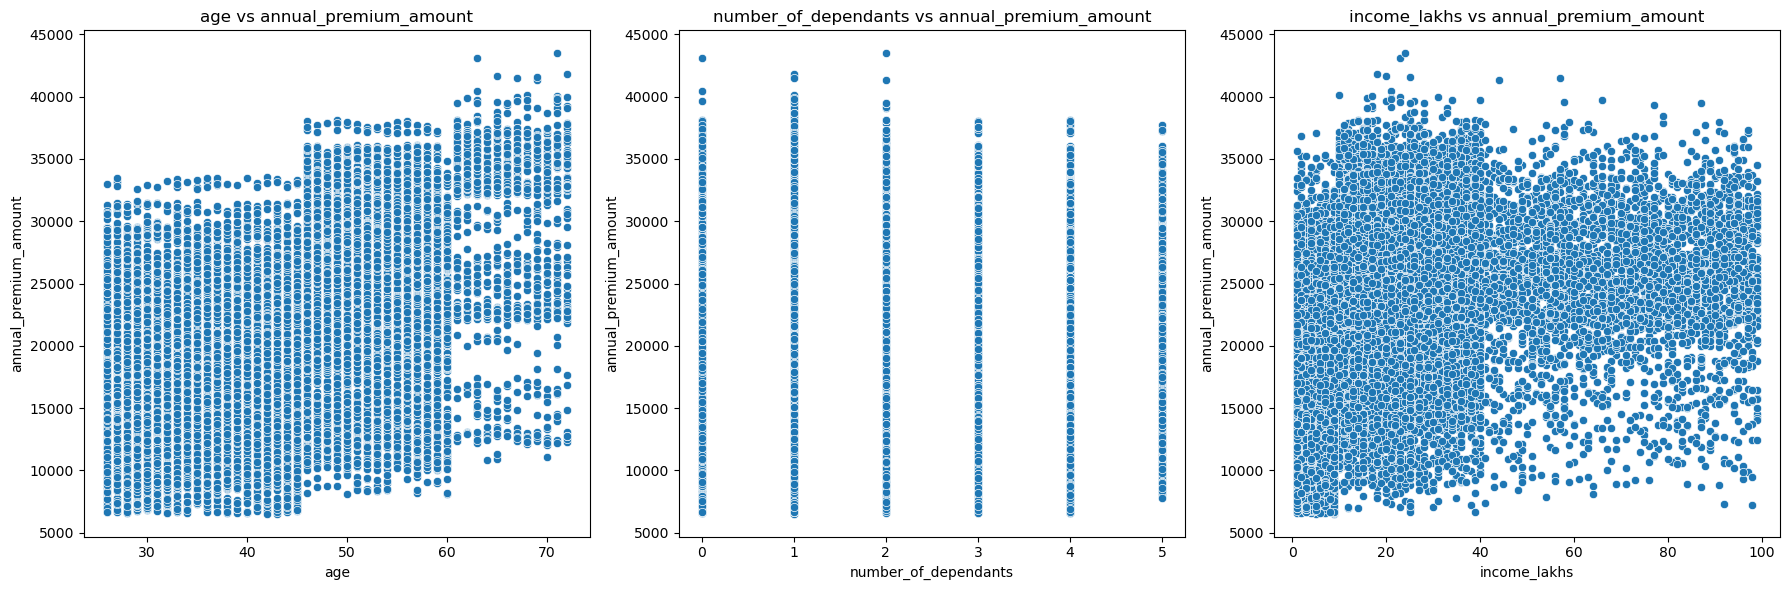

In [26]:
col_variables = ['age', 'number_of_dependants', 'income_lakhs']
col_amount = 'annual_premium_amount'

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create 1 row, 3 columns of subplots

for idx, feature in enumerate(col_variables):
    sns.scatterplot(x=df2[feature], y=df2[col_amount], ax=axes[idx])
    axes[idx].set_title(f"{feature} vs {col_amount}")

plt.tight_layout()  # Adjust spacing
plt.show()

### Cleaning Dataset (Categorial)

In [27]:
col_cat = df.columns.drop(col_num)
col_cat



Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [28]:
for i in col_cat:
    print(f'{i} : {df2[i].unique()}')

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [29]:
df2['smoking_status'].replace({'Smoking=0': 'No Smoking',
                               'Does Not Smoke': 'No Smoking',
                               'Not Smoking': 'No Smoking'}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10064\1853564941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({'Smoking=0': 'No Smoking',


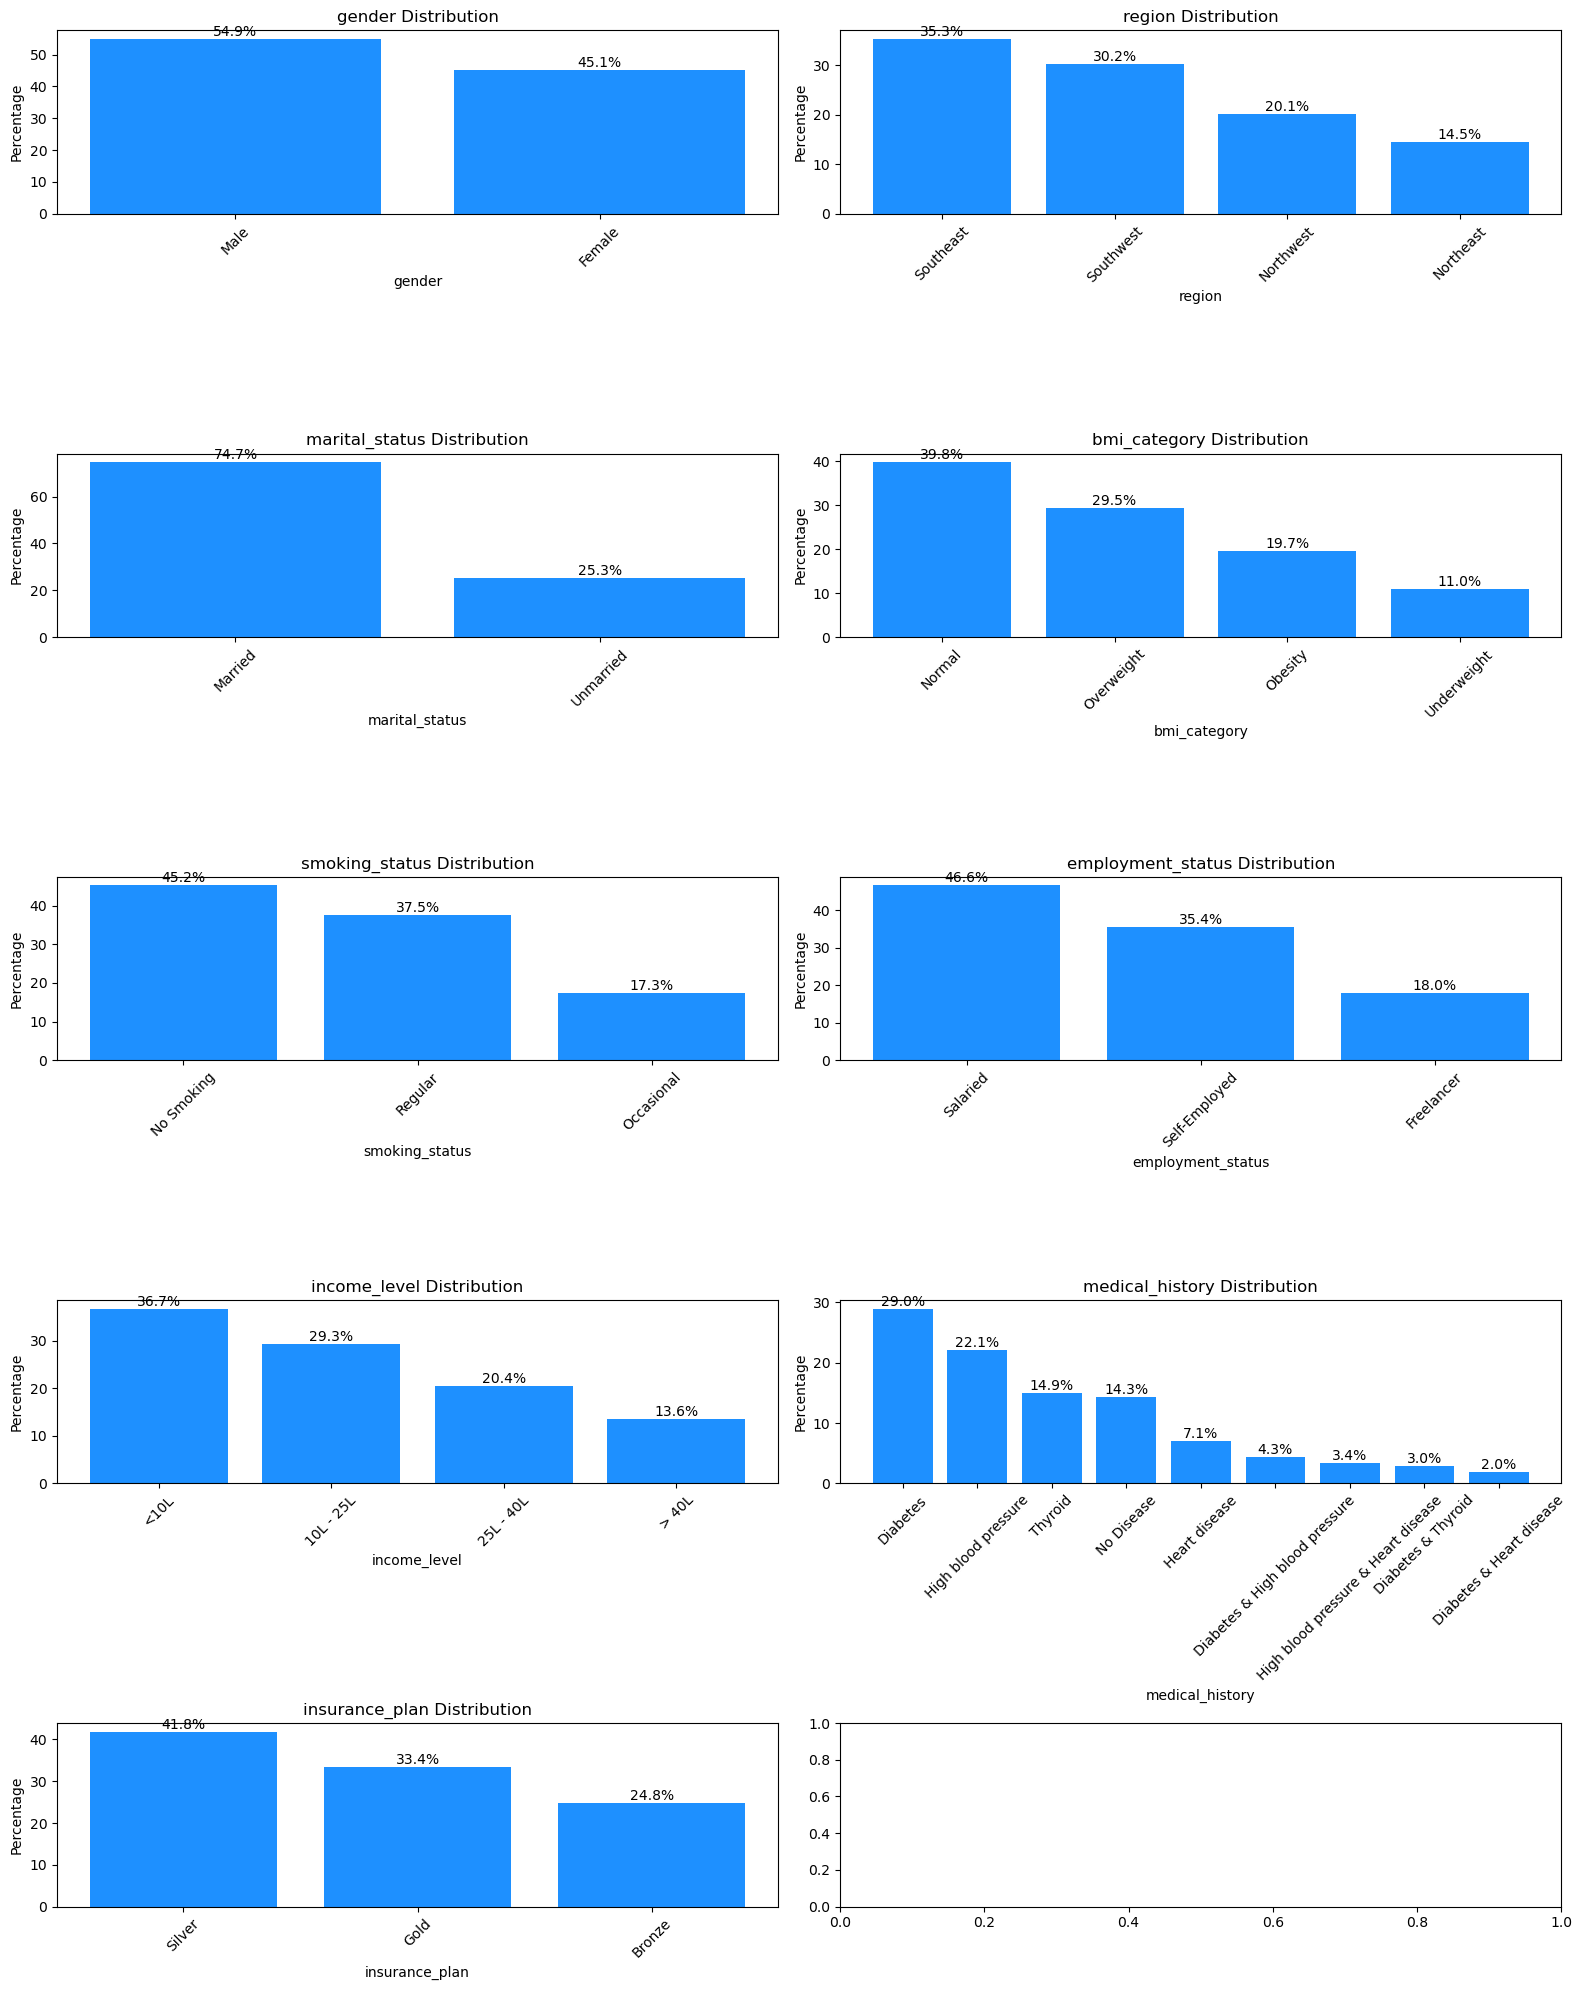

In [30]:
fig, axes = plt.subplots(5, 2, figsize=(16, 20))  # 3x3 grid
axes = axes.flatten()  # Flatten to iterate easily

for idx, col in enumerate(col_cat):
    percentage = df2[col].value_counts(normalize=True) * 100  # Get percentage
    bars = axes[idx].bar(percentage.index, percentage.values, color='dodgerblue')  # Darker bars
    axes[idx].set_title(f"{col} Distribution")
    axes[idx].set_ylabel("Percentage")
    axes[idx].set_xlabel(col)
    axes[idx].tick_params(axis='x', rotation=45)  # Rotate labels for readability
    
    # Add percentage labels on top of bars
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}%', 
                       ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()  # Adjust layout
plt.show()

In [31]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [32]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [33]:
risk_score = {
    'diabetes': 6,  
    'high blood pressure': 6,  
    'thyroid': 5,
    'heart disease': 8,
    'no disease': 0,  
    'none': 0, 
}                   # this score needs to be discussed with buisness owner

df2[['disease1', 'disease2']] = df2['medical_history'].str.split('&', expand=True).apply(lambda x: x.str.lower())


In [34]:
df2.head(25)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,None
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,None
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,diabetes,None
5,33,Male,Southeast,Married,3,Normal,Regular,Self-Employed,<10L,4,Diabetes & High blood pressure,Silver,20653,diabetes,high blood pressure
6,43,Male,Northeast,Married,3,Overweight,Regular,Salaried,> 40L,46,Thyroid,Gold,26926,thyroid,None
7,59,Female,Southeast,Unmarried,0,Overweight,No Smoking,Freelancer,10L - 25L,21,No Disease,Gold,26101,no disease,None
8,46,Female,Southeast,Married,4,Normal,Occasional,Self-Employed,10L - 25L,21,Thyroid,Gold,27176,thyroid,None
9,68,Female,Southwest,Married,1,Normal,No Smoking,Self-Employed,<10L,1,Diabetes,Bronze,12596,diabetes,None


In [35]:
df2.disease1.isnull().sum(), df2.disease2.isnull().sum(), df2.disease2.value_counts()

(0,
 25996,
 disease2
 heart disease          1592
 high blood pressure    1286
 thyroid                 880
 Name: count, dtype: int64)

In [36]:
# Clean disease columns (remove extra spaces and convert to lowercase)
df2['disease1'] = df2['disease1'].str.strip().str.lower()
df2['disease2'] = df2['disease2'].str.strip().str.lower()


In [37]:
df2['disease1'] = df2['disease1'].fillna('none')  # Handle NaN values
df2['disease2'] = df2['disease2'].fillna('none')  # Handle NaN values

df2['total_risk_score'] = 0  # Initialize column

# Loop over disease columns to sum up the risk scores
for disease in ['disease1', 'disease2']:
    # Apply the risk score mapping and fill NaN with 0
    df2['total_risk_score'] += df2[disease].map(risk_score).fillna(0)

# Check the results of total_risk_score
print(df2[['disease1', 'disease2', 'total_risk_score']].head())

# Now normalize the risk score
maxx = df2['total_risk_score'].max()
minn = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - minn) / (maxx - minn)

# Check the normalized risk scores
df2.head()


              disease1 disease2  total_risk_score
0             diabetes     none                 6
1             diabetes     none                 6
2  high blood pressure     none                 6
3           no disease     none                 0
4             diabetes     none                 6


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,diabetes,none,6,0.428571


In [38]:
maxx, minn

(14, 0)

In [39]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})


In [40]:
df2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [41]:
df2['income_level'] = df2['income_level'].map({'<10L': 1, '10L - 25L': 2, '> 40L': 4, '25L - 40L':3})


In [42]:
col_nominal = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status','employment_status']

In [43]:
df3 = pd.get_dummies(df2, columns=col_nominal, drop_first=True, dtype=int)

In [44]:
df3.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount',
       'disease1', 'disease2', 'total_risk_score', 'normalized_risk_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [45]:
df4 = df3.drop(['medical_history', 'disease1', 'disease2', 'total_risk_score'], axis=1)

In [46]:
df4.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'normalized_risk_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [47]:
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,15610,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


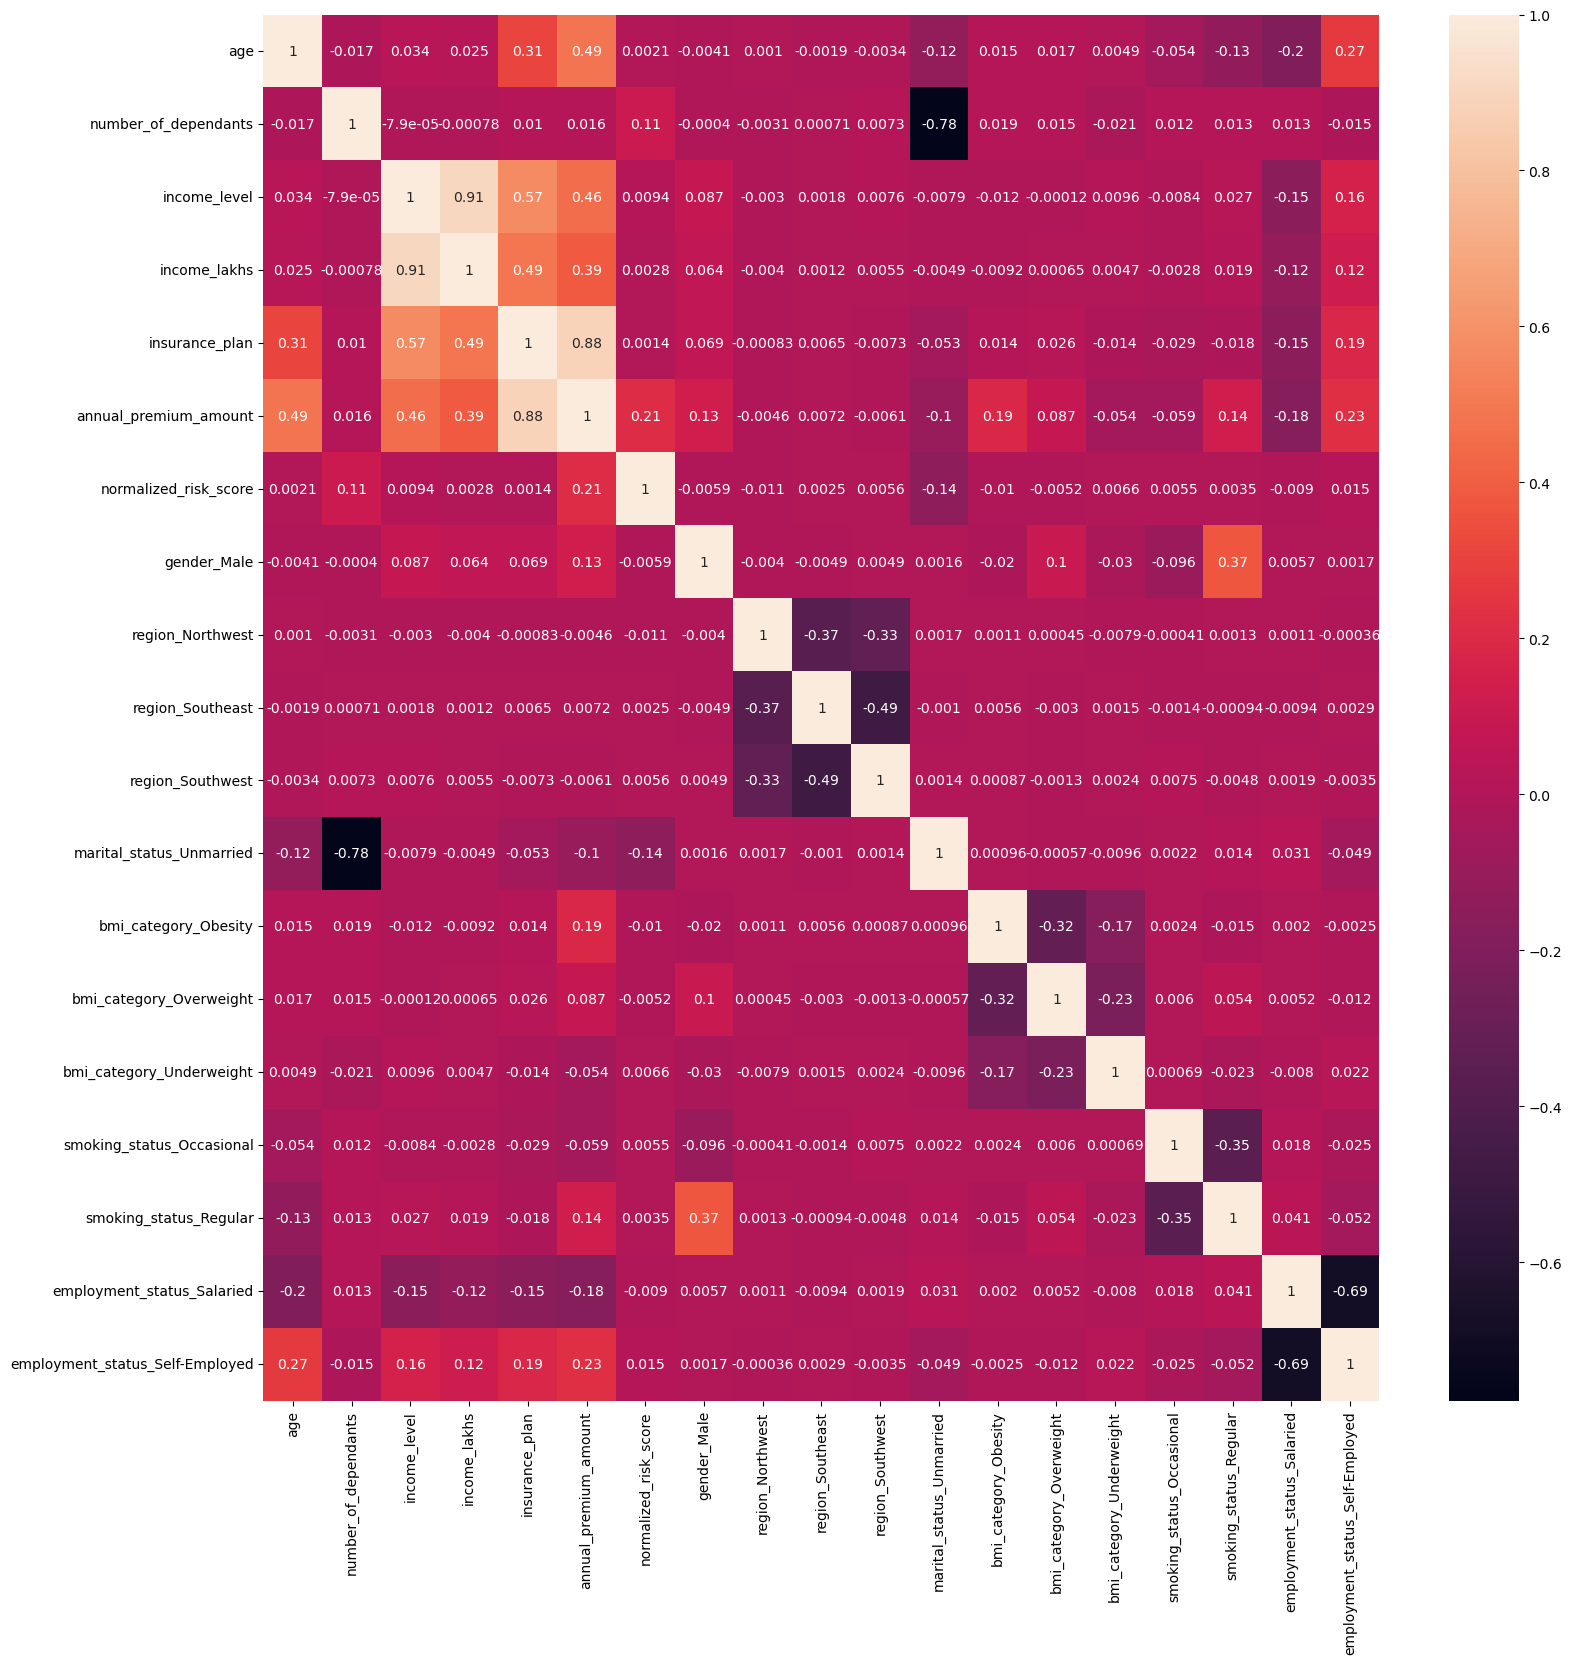

In [48]:
cm = df4.corr()

plt.figure(figsize=(18, 18))
sns.heatmap(cm, annot=True)
plt.show()

In [49]:
df4.head(1)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0


### Feature Engineering

In [50]:
X = df4.drop('annual_premium_amount', axis=1)
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
col_to_scale = ['age', 'number_of_dependants','income_level' ,'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[col_to_scale] = scaler.fit_transform(X[col_to_scale])
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.000000,0.051020,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.000000,0.051020,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.333333,0.193878,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,1.000000,0.775510,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.333333,0.132653,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [51]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000,29754.000000
mean,0.371683,0.477536,0.369788,0.225009,0.543322,0.426404,0.548968,0.200746,0.352726,0.301875,0.253378,0.196982,0.294918,0.110103,0.173254,0.374605,0.466189,0.354272
std,0.240080,0.284145,0.350221,0.226314,0.378885,0.240132,0.497605,0.400565,0.477826,0.459079,0.434953,0.397725,0.456014,0.313023,0.378473,0.484029,0.498864,0.478300
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.061224,0.500000,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.163265,0.500000,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.316327,1.000000,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['feature'] = data.columns
    vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

In [53]:
calculate_vif(X)

,feature,VIF
0,age,3.924740
1,number_of_dependants,6.276728
2,income_level,14.063416
3,income_lakhs,11.408527
4,insurance_plan,5.260860
5,normalized_risk_score,3.809601
6,gender_Male,2.598259
7,region_Northwest,2.123193
8,region_Southeast,2.979784
9,region_Southwest,2.708419


In [54]:
calculate_vif(X.drop('income_level', axis=1))

,feature,VIF
0,age,3.865086
1,number_of_dependants,6.276116
2,income_lakhs,2.690925
3,insurance_plan,4.571804
4,normalized_risk_score,3.807473
5,gender_Male,2.590560
6,region_Northwest,2.122529
7,region_Southeast,2.978859
8,region_Southwest,2.706927
9,marital_status_Unmarried,2.345161


In [55]:
X_reduced = X.drop('income_level', axis=1)
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.051020,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.051020,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.193878,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.775510,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.132653,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


### Model Training 

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=11)

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20827, 17), (8927, 17), (20827,), (8927,))

In [58]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)
train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test, y_test)

train_score, test_score

(0.9533359654434668, 0.9540138534947757)

In [59]:
model_lr.coef_, model_lr.intercept_

(array([ 6996.08739987, -1272.72381589,  -776.37509972, 14864.71197367,
         6035.77865114,    70.82898614,   -33.06140112,    16.17094138,
           18.70569166,  -696.42496455,  3897.05719515,  1975.53318926,
          544.72143723,   830.0848907 ,  2792.15475154,   -43.51619843,
          253.9341711 ]),
 5889.071490254217)

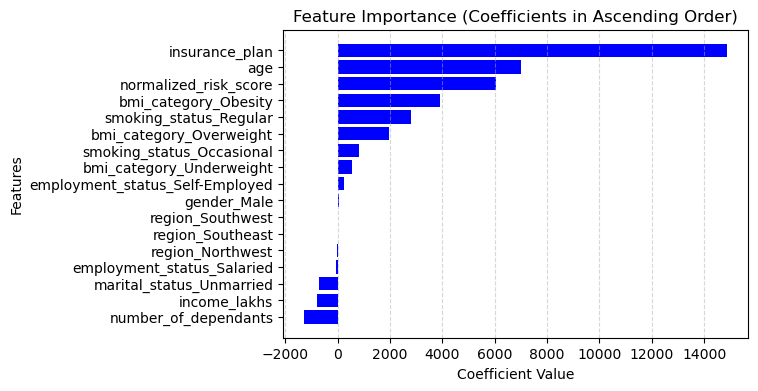

In [60]:
feature_names = X_train.columns

# Convert to DataFrame for easy sorting
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model_lr.coef_})

# Sort by coefficient values in ascending order
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)

# Plot
plt.figure(figsize=(6, 4))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance (Coefficients in Ascending Order)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [61]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# Define models and hyperparameters
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}  # No hyperparameters to tune for Linear Regression
    },
    'Ridge': {
        'model': Ridge(),
        'params': {'alpha': uniform(0.1, 10)}  # Tuning alpha for Ridge
    },
    'Lasso': {
        'model': Lasso(),
        'params': {'alpha': uniform(0.01, 1)}  # Tuning alpha for Lasso
    },
    'XGBoost': {
        'model': XGBRegressor(objective='reg:squarederror', random_state=42),
        'params': {
            'n_estimators': np.arange(50, 300, 50),
            'learning_rate': uniform(0.01, 0.3),
            'max_depth': np.arange(3, 10),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5)
        }
    }
}

# Dictionary to store best models
best_models = {}

# Loop through each model and perform RandomizedSearchCV
for name, model_info in models.items():
    clf = RandomizedSearchCV(model_info['model'], model_info['params'], n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=42)
    clf.fit(X_train, y_train)
    
    best_models[name] = clf.best_estimator_

# Display the best models for each algorithm
best_models


d:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'LinearRegression': LinearRegression(),
 'Ridge': Ridge(alpha=0.6808361216819946),
 'Lasso': Lasso(alpha=0.16601864044243653),
 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7229163764267956, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.039992474745400866, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)}

In [62]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42, n_estimators=250, learning_rate=0.04, max_depth=5, subsample=0.8, colsample_bytree=0.7229163764267956)
model_xgb.fit(X_train, y_train)

train_score = model_xgb.score(X_train, y_train)
test_score = model_xgb.score(X_test, y_test)
train_score, test_score

(0.9980418682098389, 0.9979199171066284)

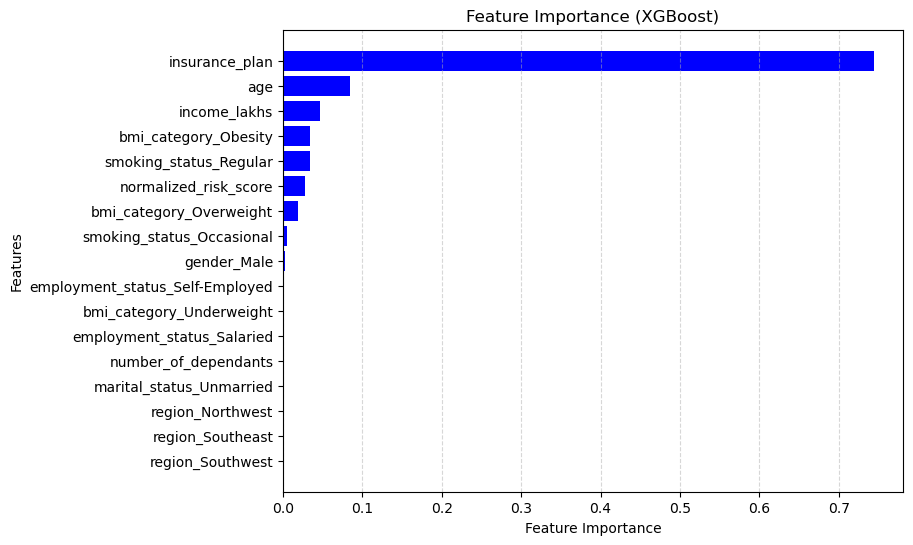

In [63]:
# Get feature importance from the best XGBoost model
model_xgb = best_models['XGBoost']
feature_importance = model_xgb.feature_importances_

# Create DataFrame
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort in ascending order
coef_df = coef_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(coef_df['Feature'], coef_df['Importance'], color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance (XGBoost)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

### Error Analysis

In [64]:
y_pred = best_models['XGBoost'].predict(X_test)
residuals = y_pred - y_test 
residuals_pct = (residuals / y_test) * 100

In [65]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'diff': residuals, 'diff (%)': residuals_pct})
result_df.info(),  result_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8927 entries, 18120 to 22219
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     8927 non-null   int64  
 1   Predicted  8927 non-null   float32
 2   diff       8927 non-null   float64
 3   diff (%)   8927 non-null   float64
dtypes: float32(1), float64(2), int64(1)
memory usage: 313.8 KB


(None,
        Actual     Predicted        diff  diff (%)
 18120   27770  27450.087891 -319.912109 -1.152006
 15137   22225  22189.685547  -35.314453 -0.158895
 14941   12389  12134.632812 -254.367188 -2.053170
 23792   11889  12098.131836  209.131836  1.759036
 12675   18244  18566.906250  322.906250  1.769931)

<Axes: xlabel='diff (%)', ylabel='Count'>

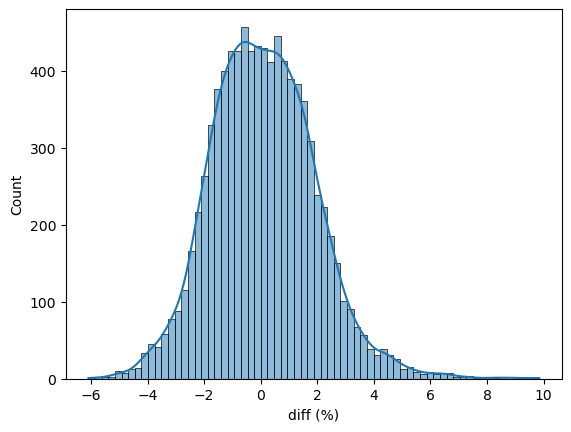

In [66]:
sns.histplot(result_df['diff (%)'], kde=True)


In [67]:
extreme_error_threshold = 10

extreme_result_df = result_df[np.abs(result_df['diff (%)']) > extreme_error_threshold]
extreme_result_df.head()

,Actual,Predicted,diff,diff (%)


In [68]:
extreme_result_df.shape[0]*100/result_df.shape[0]  #total around 30% of data is having error more than 10%

0.0

In [69]:
result_df.sort_values(by='diff (%)', ascending=False)

,Actual,Predicted,diff,diff (%)
10830,6653,7308.169434,655.169434,9.847729
19807,6692,7337.327637,645.327637,9.643270
12189,6571,7190.147949,619.147949,9.422431
14049,8707,9487.873047,780.873047,8.968336
17811,6569,7155.901367,586.901367,8.934410
...,...,...,...,...
18794,8026,7586.827148,-439.172852,-5.471877
22816,9616,9087.737305,-528.262695,-5.493580
340,11092,10446.105469,-645.894531,-5.823066
6348,10113,9523.919922,-589.080078,-5.824979


In [70]:

extreme_error_df = X_test.loc[extreme_result_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed


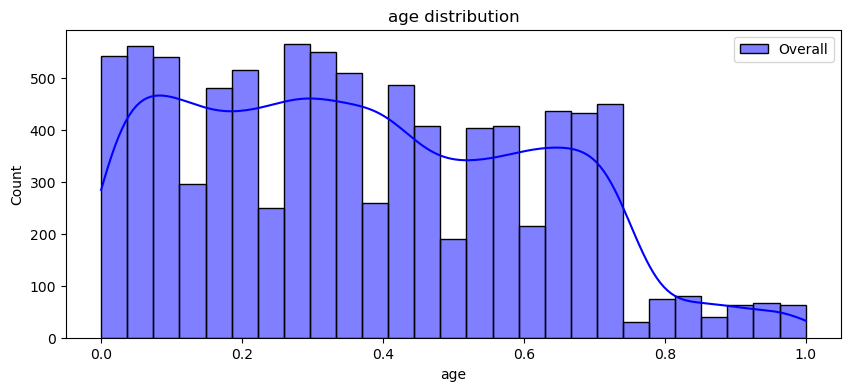

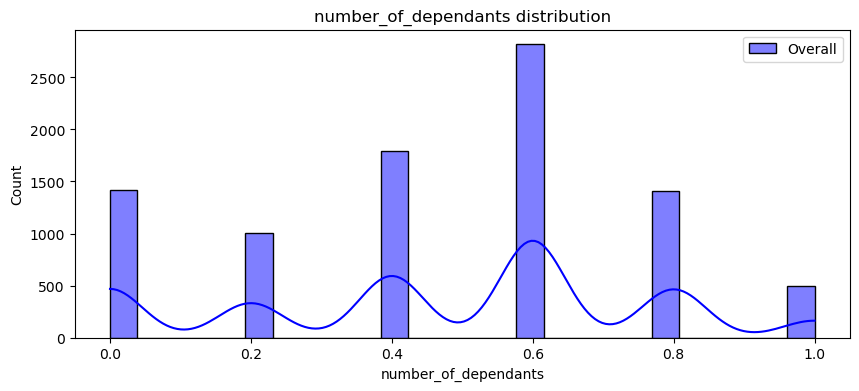

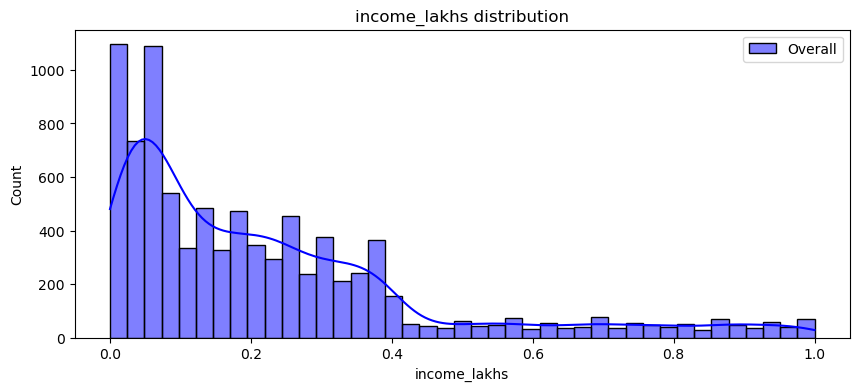

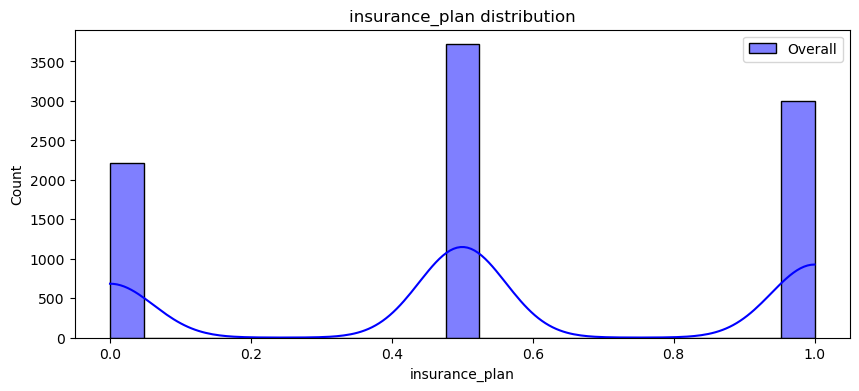

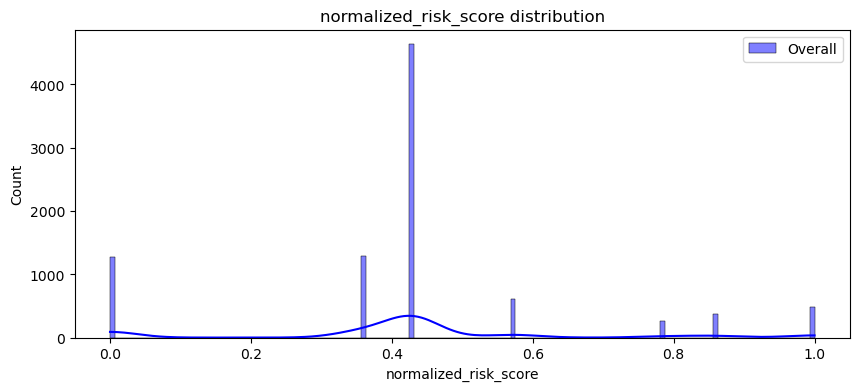

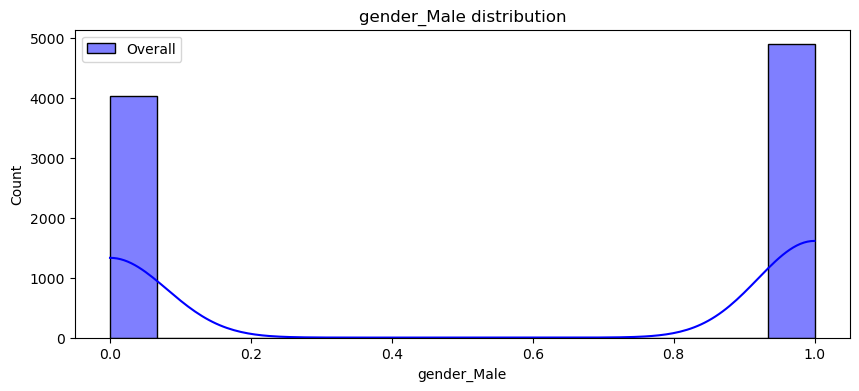

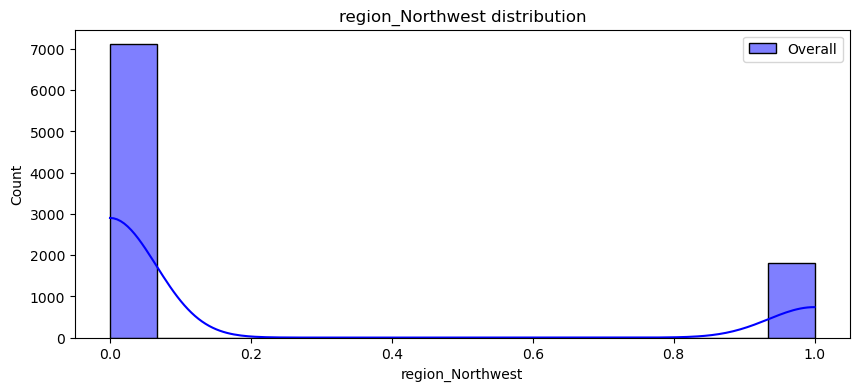

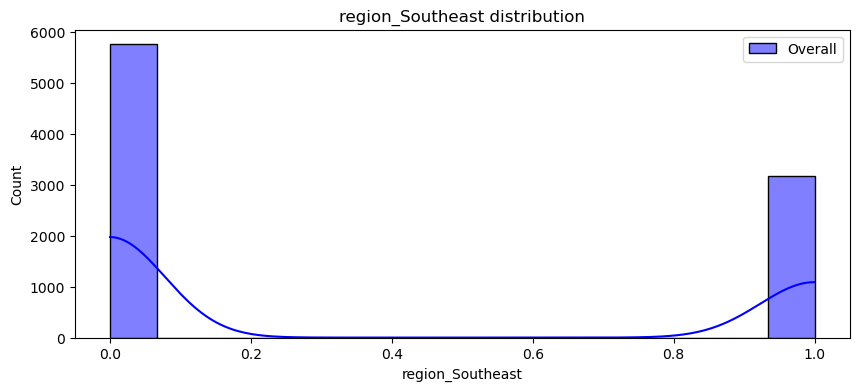

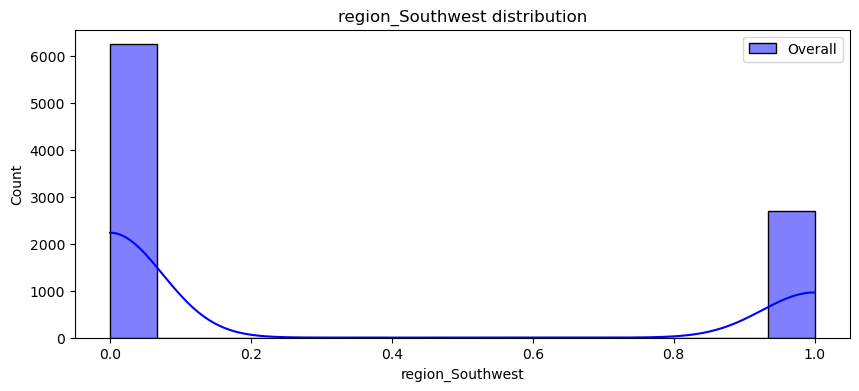

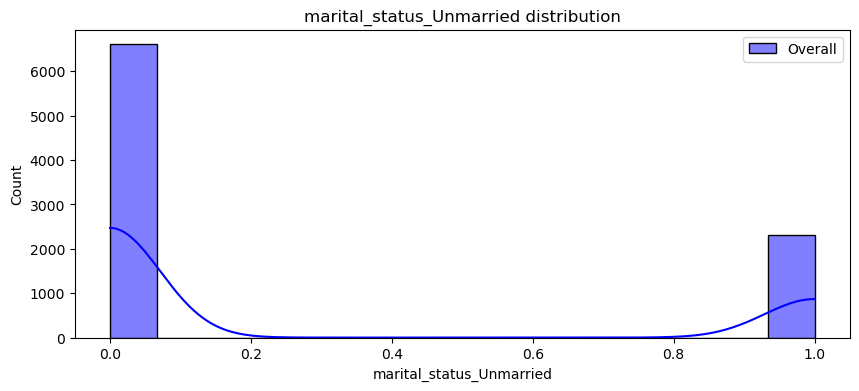

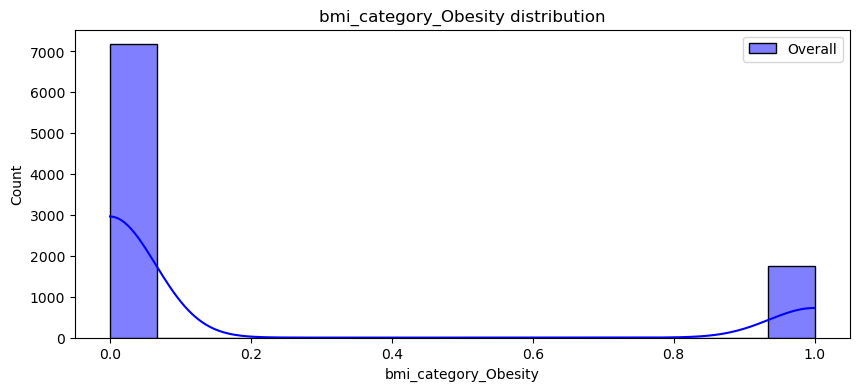

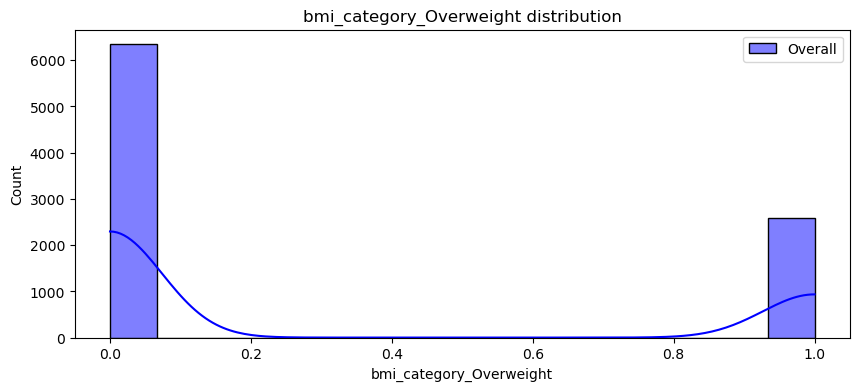

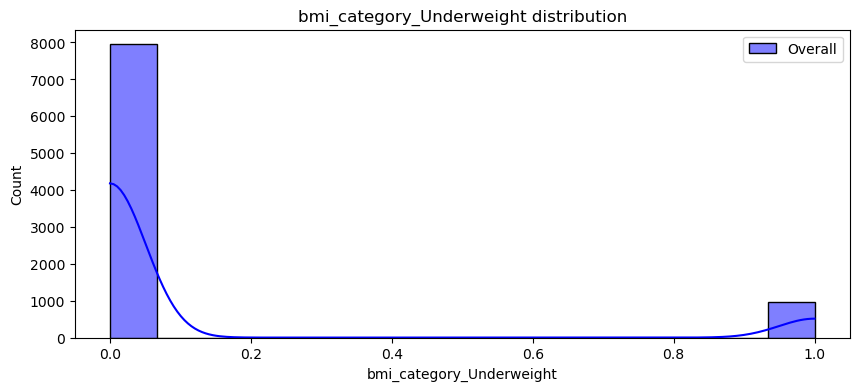

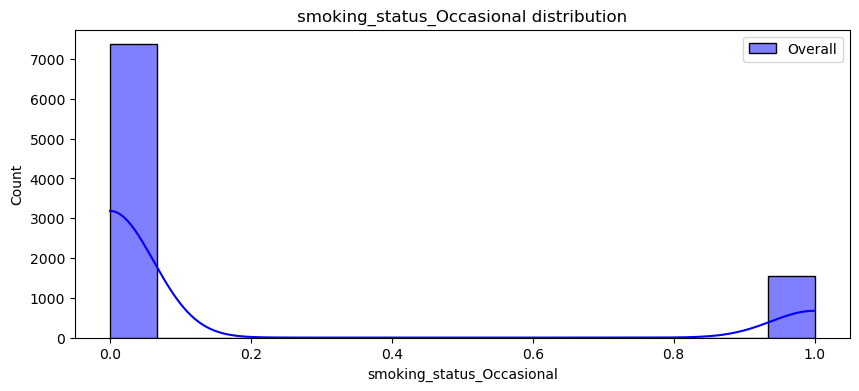

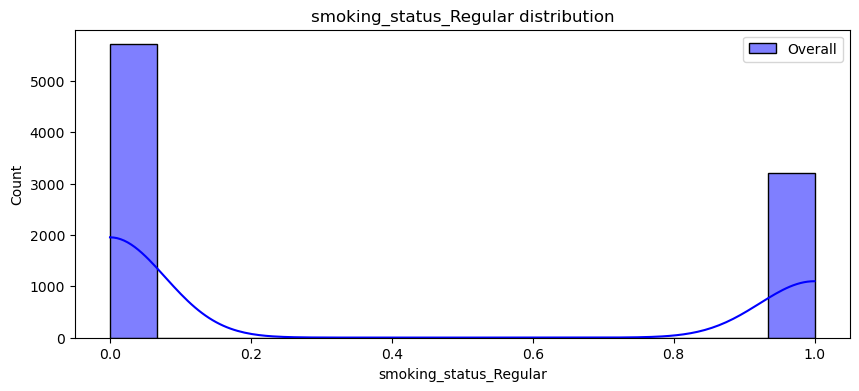

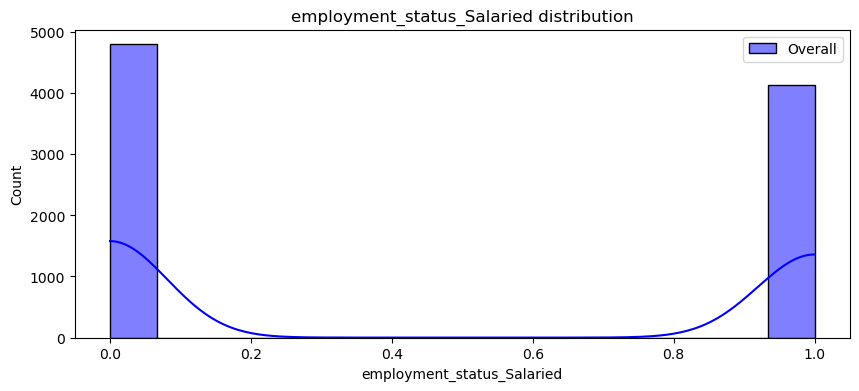

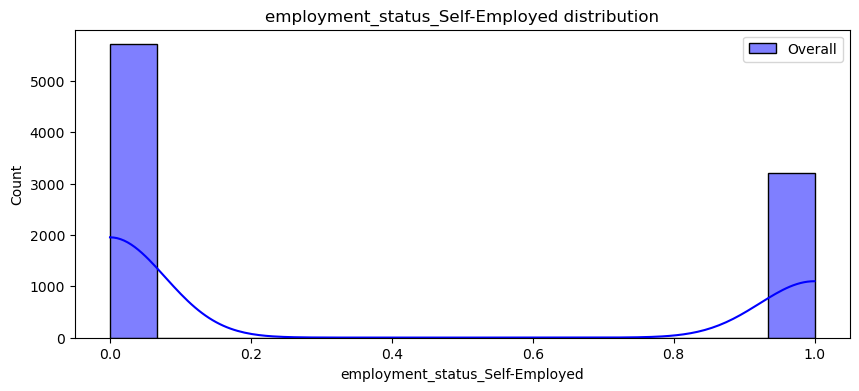

In [71]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_error_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', kde=True)
    plt.title(f"{feature} distribution")
    plt.legend()  # To show labels properly
    plt.show()

<Axes: >

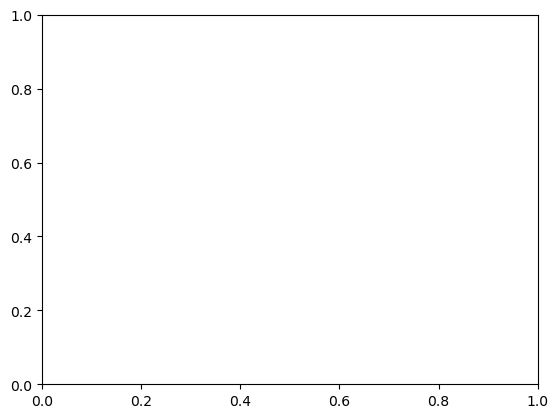

In [72]:
sns.histplot(extreme_error_df['age'], color='green', label='Extreme Errors', kde=True)

In [73]:
extreme_error_df['income_level'] = 1  # no matter wahat income level is, so, we are going to set it to 1
df_reversed = pd.DataFrame()
df_reversed[col_to_scale] = scaler.inverse_transform(extreme_error_df[col_to_scale])
df_reversed


ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required.

In [ ]:
extreme_error_df.drop('income_level', axis=1, inplace=True)

<Axes: xlabel='age', ylabel='Count'>

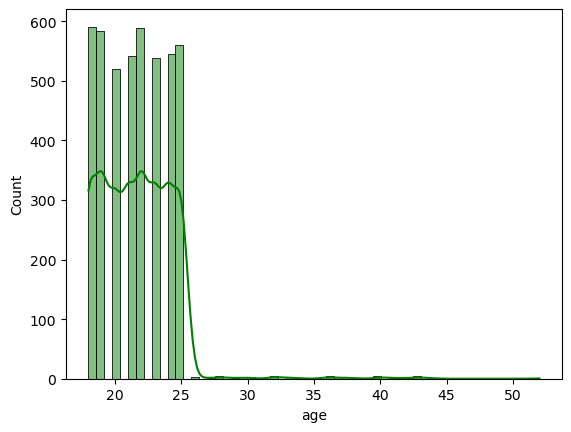

In [ ]:
sns.histplot(df_reversed['age'], color='green', label='Extreme Errors', kde=True)

In [ ]:
df_reversed['age'].quantile(0.98)

25.0